# America’s Shopping Cart: The Public Health Impacts of Warehouse Infrastructure in the Inland Empire (Part A)
**UP206A Midterm | Winter 2021 | By: Angelica Ruiz**

## Background
Although Los Angeles, CA is often seen as the center for transportation of goods due to the ports that exist there, about 65 miles east lies the country’s largest logistics distribution hub: the Inland Empire. In the span of about 10 years, over 150 million square feet of industrial space has been converted to warehouse ([Sierra Club](https://www.sierraclub.org/sierra/are-warehouses-inland-empire-blessing-or-curse)). 

The Inland Empire is composed of various cities within Riverside and San Bernardino Counties. The residents of both these counties have historically been exposed to hazardous air toxins due to decades of racist land use and zoning policies. In 2019, the American Lung Association listed Riverside and San Bernardino Counties as the most ozone-polluted places in the U.S. ([Sierra Club](https://www.sierraclub.org/sierra/are-warehouses-inland-empire-blessing-or-curse)). Furthermore, asthma rates in the Inland Empire are twice as high as the national average ([Earth Justice](https://earthjustice.org/blog/2020-april/amazon-inland-empire-workers-covid-19)).  

## Research Question
What are the potential public health and environmental impacts of warehouses in the Inland Empire?

# Data Sources

In order to analyze the research question I have posed, I have found some data sources that provide data on the variables I'm interested in further exploring. Below are a list of the data and their sources that I'll be using.

- Demographic data
- Census Reporter
  - [Riverside County](https://censusreporter.org/profiles/05000US06065-riverside-county-ca/)
  - [San Bernardino County](https://censusreporter.org/profiles/05000US06071-san-bernardino-county-ca/)
- Health and environmental data
  - [CalEnviroScreen 3.0](https://oehha.ca.gov/calenviroscreen/maps-data/download-data)

## Loading Libraries

In [1]:
#load libraries
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px

Now that I've loaded the libraries that I'll be using for analysis and data exploration, I'm going to import the census datasets for the variables of race and poverty. Unfortunately, I was only able to find separate datasets for each county--both for race and poverty. Therefore, after I import the race and poverty datasets for Riverside and San Bernardino County, I'll merge them so that the maps I create can better represent the Inland Empire.

# Race Data

First, I'll be importing the race datasets for both counties. Before merging them, I'll be taking a look at the data and cleaning it up, if necessary.

## Import Data

In [2]:
#import riverside race data
race_r_gdf = gpd.read_file('race_data/race_R.geojson')

In [3]:
race_r_gdf.head(3)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06065,"Riverside County, CA",2411439.0,0.0,1231961.0,0.0,851702.0,892.0,147160.0,1619.0,...,338.0,513186.0,11136.0,48333.0,2898.0,27833.0,2124.0,20500.0,1858.0,"MULTIPOLYGON (((-117.67244 33.87026, -117.6725..."
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1201.0,88.0,498.0,92.0,135.0,82.0,176.0,87.0,...,12.0,497.0,133.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2277.0,329.0,678.0,119.0,568.0,126.0,5.0,9.0,...,2.0,877.0,300.0,36.0,25.0,36.0,25.0,0.0,12.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."


In [4]:
#delete first row since it's riverside county total
race_r_gdf = race_r_gdf.drop([0])

In [5]:
#double check it was dropped
race_r_gdf.head(3)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1201.0,88.0,498.0,92.0,135.0,82.0,176.0,87.0,...,12.0,497.0,133.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2277.0,329.0,678.0,119.0,568.0,126.0,5.0,9.0,...,2.0,877.0,300.0,36.0,25.0,36.0,25.0,0.0,12.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,478.0,2582.0,346.0,1016.0,228.0,648.0,189.0,...,17.0,2142.0,619.0,212.0,191.0,88.0,115.0,124.0,151.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."


Now that the county row was dropped, it's time to import the San Bernardino County race data. I'll likely also need to drop the first row of the data.

In [6]:
#import san bernardino race data
race_sb_gdf = gpd.read_file('race_data/race_SB.geojson')

In [7]:
race_sb_gdf.head(3)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06071,"San Bernardino County, CA",2149031.0,0.0,1003157.0,0.0,613066.0,544.0,169340.0,1904.0,...,288.0,364976.0,6810.0,53930.0,3220.0,28871.0,2154.0,25059.0,2013.0,"MULTIPOLYGON (((-117.66724 34.73433, -117.6672..."
1,14000US06071000103,"Census Tract 1.03, San Bernardino, CA",4438.0,404.0,3116.0,367.0,1153.0,226.0,167.0,131.0,...,12.0,481.0,277.0,83.0,86.0,62.0,78.0,21.0,35.0,"MULTIPOLYGON (((-117.76775 34.01960, -117.7676..."
2,14000US06071000104,"Census Tract 1.04, San Bernardino, CA",6928.0,440.0,5358.0,458.0,1598.0,311.0,331.0,122.0,...,17.0,347.0,206.0,112.0,95.0,72.0,81.0,40.0,30.0,"MULTIPOLYGON (((-117.76992 34.00464, -117.7693..."


In [8]:
#delete first row
race_sb_gdf = race_sb_gdf.drop([0])

In [9]:
#double check it was dropped
race_sb_gdf.head(3)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,14000US06071000103,"Census Tract 1.03, San Bernardino, CA",4438.0,404.0,3116.0,367.0,1153.0,226.0,167.0,131.0,...,12.0,481.0,277.0,83.0,86.0,62.0,78.0,21.0,35.0,"MULTIPOLYGON (((-117.76775 34.01960, -117.7676..."
2,14000US06071000104,"Census Tract 1.04, San Bernardino, CA",6928.0,440.0,5358.0,458.0,1598.0,311.0,331.0,122.0,...,17.0,347.0,206.0,112.0,95.0,72.0,81.0,40.0,30.0,"MULTIPOLYGON (((-117.76992 34.00464, -117.7693..."
3,14000US06071000105,"Census Tract 1.05, San Bernardino, CA",6392.0,358.0,4783.0,448.0,1711.0,381.0,343.0,253.0,...,17.0,324.0,217.0,70.0,68.0,4.0,7.0,66.0,67.0,"MULTIPOLYGON (((-117.75825 33.99585, -117.7581..."


## Merge Datasets

In [10]:
#merge
race_combined = race_r_gdf.append(race_sb_gdf)

In [11]:
#double check it merged correctly
race_combined.head(-10)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1201.0,88.0,498.0,92.0,135.0,82.0,176.0,87.0,...,12.0,497.0,133.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2277.0,329.0,678.0,119.0,568.0,126.0,5.0,9.0,...,2.0,877.0,300.0,36.0,25.0,36.0,25.0,0.0,12.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,478.0,2582.0,346.0,1016.0,228.0,648.0,189.0,...,17.0,2142.0,619.0,212.0,191.0,88.0,115.0,124.0,151.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,405.0,2735.0,260.0,2297.0,210.0,156.0,101.0,...,12.0,568.0,320.0,64.0,53.0,29.0,37.0,35.0,36.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274..."
5,14000US06065030300,"Census Tract 303, Riverside, CA",4071.0,336.0,2036.0,253.0,1411.0,223.0,440.0,152.0,...,12.0,1023.0,292.0,166.0,124.0,58.0,66.0,108.0,107.0,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,14000US06071012001,"Census Tract 120.01, San Bernardino, CA",5815.0,487.0,3141.0,411.0,1367.0,206.0,824.0,237.0,...,22.0,404.0,169.0,41.0,44.0,24.0,26.0,17.0,28.0,"MULTIPOLYGON (((-117.05623 34.86292, -117.0540..."
356,14000US06071012002,"Census Tract 120.02, San Bernardino, CA",5653.0,402.0,2606.0,313.0,1586.0,213.0,626.0,318.0,...,17.0,519.0,245.0,251.0,140.0,129.0,100.0,122.0,100.0,"MULTIPOLYGON (((-117.01234 34.87781, -117.0123..."
357,14000US06071012101,"Census Tract 121.01, San Bernardino, CA",5860.0,359.0,4551.0,464.0,3181.0,471.0,621.0,405.0,...,17.0,203.0,188.0,315.0,249.0,73.0,96.0,242.0,237.0,"MULTIPOLYGON (((-117.31448 34.56865, -117.3143..."
358,14000US06071012103,"Census Tract 121.03, San Bernardino, CA",3562.0,527.0,2819.0,478.0,2452.0,477.0,103.0,78.0,...,12.0,140.0,132.0,59.0,94.0,41.0,65.0,18.0,29.0,"MULTIPOLYGON (((-117.03343 34.45055, -117.0322..."


## Drop Columns

Since I'm interested in looking at Latinx and all other races, I can drop the columns that further subset the Latinx race category.

In [12]:
#list column names
list(race_combined)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [13]:
#columns to keep
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [14]:
#redefine to only include the `columns_to_keep`
race_combined = race_combined[columns_to_keep]

In [15]:
#confirm it dropped columns I didn't need
race_combined.head(3)

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1201.0,498.0,135.0,176.0,0.0,160.0,0.0,27.0,0.0,703.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2277.0,678.0,568.0,5.0,1.0,54.0,0.0,0.0,50.0,1599.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,2582.0,1016.0,648.0,9.0,728.0,0.0,12.0,169.0,5068.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."


## Rename Columns

In order to implement a meaningful analysis, I'm going to rename the columns so that I know which race corresponds with it. To do this, I look at the `metadata.json` file for race and their corresponding numbers.

In [16]:
#rename columns
race_combined.columns = ['geoid',
 'name',
 'Total',
 'Not Latinx',
 'Non Latinx White',
 'Non Latinx Black',
 'Non Latinx American Indian and Alaska Native',
 'Non Latinx Asian',
 'Non Latinx Native Hawaiian and Other Pacific Islander',
 'Non Latinx Some other race',
 'Non Latinx Two or more races',
 'Latinx',
 'geometry']

In [17]:
#double check
race_combined.head(3)

,geoid,name,Total,Not Latinx,Non Latinx White,Non Latinx Black,Non Latinx American Indian and Alaska Native,Non Latinx Asian,Non Latinx Native Hawaiian and Other Pacific Islander,Non Latinx Some other race,Non Latinx Two or more races,Latinx,geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1201.0,498.0,135.0,176.0,0.0,160.0,0.0,27.0,0.0,703.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2277.0,678.0,568.0,5.0,1.0,54.0,0.0,0.0,50.0,1599.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,2582.0,1016.0,648.0,9.0,728.0,0.0,12.0,169.0,5068.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."


Now that I've imported and cleaned up the race data, I'm going to move ahead and conduct some descriptive stats, followed by some maps.

## Simple Stats and Plots

In [18]:
#descriptive stats
race_combined['Latinx'].describe()

count      822.000000
mean      2828.895377
std       1805.751685
min          0.000000
25%       1509.750000
50%       2602.500000
75%       3795.750000
max      11661.000000
Name: Latinx, dtype: float64

This shows that the average number of Latinx individuals in a census tract is about 2,829, with a median of about 2,602. The minimum of Latinx in a census tract is 0, which I find extremely interesting but not surprising considering that some part of the Inland Empire are very rural. The max of Latinx individuals in a census tract is 11,661. 

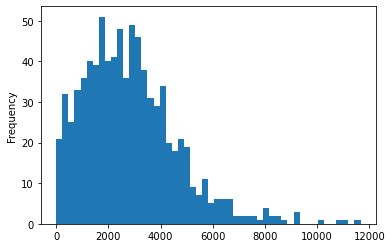

In [19]:
#simple histogram
race_combined['Latinx'].plot.hist(bins=50)

This histogram shows the number of self-identified Latinx individuals there are per census tract.

## Normalize Data

In order to compare across census tracts, I must first normalize the data. I'll be converting it to a percent so that we can see the percent of each race in each of the census tracts.

In [20]:
list(race_combined)

['geoid',
 'name',
 'Total',
 'Not Latinx',
 'Non Latinx White',
 'Non Latinx Black',
 'Non Latinx American Indian and Alaska Native',
 'Non Latinx Asian',
 'Non Latinx Native Hawaiian and Other Pacific Islander',
 'Non Latinx Some other race',
 'Non Latinx Two or more races',
 'Latinx',
 'geometry']

In [21]:
#normalizing all the columns
race_combined['Percent Not Latinx'] = race_combined['Not Latinx']/race_combined['Total']*100
race_combined['Percent Latinx'] = race_combined['Latinx']/race_combined['Total']*100
race_combined['Percent Non Latinx White'] = race_combined['Non Latinx White']/race_combined['Total']*100
race_combined['Percent Non Latinx Black'] = race_combined['Non Latinx Black']/race_combined['Total']*100
race_combined['Percent Non Latinx American Indian and Alaska Native'] = race_combined['Non Latinx American Indian and Alaska Native']/race_combined['Total']*100
race_combined['Percent Non Latinx Asian'] = race_combined['Non Latinx Asian']/race_combined['Total']*100
race_combined['Percent Non Latinx Native Hawaiian and Other Pacific Islander'] = race_combined['Non Latinx Native Hawaiian and Other Pacific Islander']/race_combined['Total']*100
race_combined['Percent Non Latinx Some other race'] = race_combined['Non Latinx Some other race']/race_combined['Total']*100
race_combined['Percent Non Latinx Two or more races'] = race_combined['Non Latinx Two or more races']/race_combined['Total']*100

I'm sure there was an easier way to do that, like a `for loop`, but I can't seem to loop my head around the code (eh, see what I did there). In all honestly though, I do need to practice it more so I don't spend time copying and pasting the same code for different columns.

In [22]:
race_combined.head()

,geoid,name,Total,Not Latinx,Non Latinx White,Non Latinx Black,Non Latinx American Indian and Alaska Native,Non Latinx Asian,Non Latinx Native Hawaiian and Other Pacific Islander,Non Latinx Some other race,...,geometry,Percent Not Latinx,Percent Latinx,Percent Non Latinx White,Percent Non Latinx Black,Percent Non Latinx American Indian and Alaska Native,Percent Non Latinx Asian,Percent Non Latinx Native Hawaiian and Other Pacific Islander,Percent Non Latinx Some other race,Percent Non Latinx Two or more races
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1201.0,498.0,135.0,176.0,0.0,160.0,0.0,27.0,...,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574...",41.465445,58.534555,11.240633,14.654455,0.000000,13.322231,0.000000,2.248127,0.000000
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2277.0,678.0,568.0,5.0,1.0,54.0,0.0,0.0,...,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748...",29.776021,70.223979,24.945103,0.219587,0.043917,2.371542,0.000000,0.000000,2.195872
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,2582.0,1016.0,648.0,9.0,728.0,0.0,12.0,...,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778...",33.751634,66.248366,13.281046,8.470588,0.117647,9.516340,0.000000,0.156863,2.209150
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,2735.0,2297.0,156.0,7.0,80.0,0.0,26.0,...,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274...",61.199373,38.800627,51.398523,3.490714,0.156635,1.790110,0.000000,0.581786,3.781607
5,14000US06065030300,"Census Tract 303, Riverside, CA",4071.0,2036.0,1411.0,440.0,8.0,65.0,7.0,7.0,...,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891...",50.012282,49.987718,34.659789,10.808155,0.196512,1.596659,0.171948,0.171948,2.407271


## Map Time!!

I'm going to compare census tracts by race, specifically: Latinx, Non Latinx Black, and Non Latinx White. This will give me an idea of the racial composition of each tract.

Text(0.5, 1.0, 'Percent Non Latinx Black')

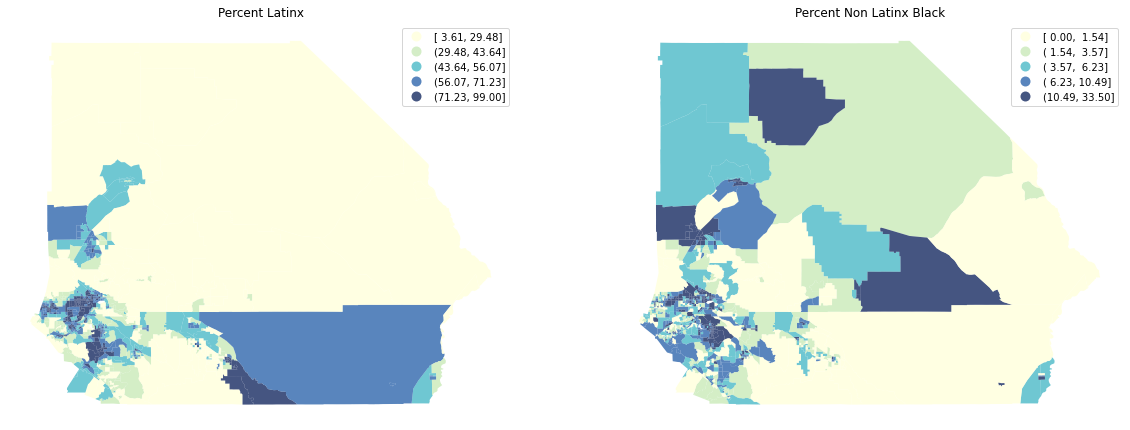

In [23]:
#1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 20))

#next, give each subplot a name
ax1, ax2 = axs

#percent Latino map (left)
race_combined.plot(column='Percent Latinx', 
            cmap='YlGnBu', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True,
           )

ax1.axis("off")
ax1.set_title("Percent Latinx")

#percent Non Latino White (right)
race_combined.plot(column='Percent Non Latinx Black', 
            cmap='YlGnBu', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True,
           )

ax2.axis("off")
ax2.set_title("Percent Non Latinx Black")

# Poverty Data

As before, first I'll import both county datasets separately. Then, I'll merge them and continue to clean up the columns names and delete columns I don't need.

## Import Data

In [24]:
#import riverside poverty data
poverty_r_gdf = gpd.read_file('poverty_data/poverty_R.geojson')

In [25]:
poverty_r_gdf.head(3)

,geoid,name,B17001001,"B17001001, Error",B17001002,"B17001002, Error",B17001003,"B17001003, Error",B17001004,"B17001004, Error",...,"B17001055, Error",B17001056,"B17001056, Error",B17001057,"B17001057, Error",B17001058,"B17001058, Error",B17001059,"B17001059, Error",geometry
0,05000US06065,"Riverside County, CA",2373706.0,3634.0,325279.0,7576.0,146534.0,3879.0,15209.0,983.0,...,1113.0,133212.0,936.0,121023.0,807.0,90715.0,770.0,71455.0,749.0,"MULTIPOLYGON (((-117.67244 33.87026, -117.6725..."
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1191.0,89.0,189.0,136.0,90.0,76.0,0.0,12.0,...,21.0,57.0,29.0,22.0,20.0,24.0,20.0,20.0,20.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2270.0,329.0,633.0,257.0,349.0,170.0,15.0,24.0,...,72.0,57.0,34.0,115.0,47.0,20.0,20.0,18.0,18.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."


In [26]:
#drop first row
poverty_r_gdf = poverty_r_gdf.drop([0])

In [27]:
#double check it dropped
poverty_r_gdf.head(3)

,geoid,name,B17001001,"B17001001, Error",B17001002,"B17001002, Error",B17001003,"B17001003, Error",B17001004,"B17001004, Error",...,"B17001055, Error",B17001056,"B17001056, Error",B17001057,"B17001057, Error",B17001058,"B17001058, Error",B17001059,"B17001059, Error",geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1191.0,89.0,189.0,136.0,90.0,76.0,0.0,12.0,...,21.0,57.0,29.0,22.0,20.0,24.0,20.0,20.0,20.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2270.0,329.0,633.0,257.0,349.0,170.0,15.0,24.0,...,72.0,57.0,34.0,115.0,47.0,20.0,20.0,18.0,18.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,478.0,794.0,408.0,373.0,209.0,0.0,17.0,...,228.0,352.0,102.0,369.0,115.0,248.0,112.0,51.0,47.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."


Time to import the San Bernardino poverty dataset! I must admit that these aren't the funnest steps to do, but definitely important. We'll get to the good stuff soon!

In [28]:
#import san bernardino poverty data
poverty_sb_gdf = gpd.read_file('poverty_data/poverty_SB.geojson')

In [29]:
poverty_sb_gdf.head(3)

,geoid,name,B17001001,"B17001001, Error",B17001002,"B17001002, Error",B17001003,"B17001003, Error",B17001004,"B17001004, Error",...,"B17001055, Error",B17001056,"B17001056, Error",B17001057,"B17001057, Error",B17001058,"B17001058, Error",B17001059,"B17001059, Error",geometry
0,05000US06071,"San Bernardino County, CA",2091206.0,2239.0,333613.0,6866.0,150655.0,4042.0,18608.0,1194.0,...,1127.0,118209.0,809.0,108264.0,1003.0,68973.0,576.0,46249.0,605.0,"MULTIPOLYGON (((-117.66724 34.73433, -117.6672..."
1,14000US06071000103,"Census Tract 1.03, San Bernardino, CA",4412.0,397.0,409.0,191.0,113.0,76.0,0.0,12.0,...,90.0,300.0,87.0,289.0,75.0,170.0,46.0,56.0,42.0,"MULTIPOLYGON (((-117.76775 34.01960, -117.7676..."
2,14000US06071000104,"Census Tract 1.04, San Bernardino, CA",6928.0,440.0,309.0,196.0,139.0,123.0,15.0,23.0,...,91.0,426.0,106.0,535.0,107.0,297.0,75.0,152.0,66.0,"MULTIPOLYGON (((-117.76992 34.00464, -117.7693..."


In [30]:
#drop first row
poverty_sb_gdf = poverty_sb_gdf.drop([0])
poverty_sb_gdf.head(3)

,geoid,name,B17001001,"B17001001, Error",B17001002,"B17001002, Error",B17001003,"B17001003, Error",B17001004,"B17001004, Error",...,"B17001055, Error",B17001056,"B17001056, Error",B17001057,"B17001057, Error",B17001058,"B17001058, Error",B17001059,"B17001059, Error",geometry
1,14000US06071000103,"Census Tract 1.03, San Bernardino, CA",4412.0,397.0,409.0,191.0,113.0,76.0,0.0,12.0,...,90.0,300.0,87.0,289.0,75.0,170.0,46.0,56.0,42.0,"MULTIPOLYGON (((-117.76775 34.01960, -117.7676..."
2,14000US06071000104,"Census Tract 1.04, San Bernardino, CA",6928.0,440.0,309.0,196.0,139.0,123.0,15.0,23.0,...,91.0,426.0,106.0,535.0,107.0,297.0,75.0,152.0,66.0,"MULTIPOLYGON (((-117.76992 34.00464, -117.7693..."
3,14000US06071000105,"Census Tract 1.05, San Bernardino, CA",6284.0,352.0,474.0,245.0,301.0,201.0,0.0,17.0,...,91.0,615.0,130.0,399.0,95.0,139.0,50.0,198.0,85.0,"MULTIPOLYGON (((-117.75825 33.99585, -117.7581..."


## Merge Datasets

In [31]:
#merge
poverty_combined = poverty_r_gdf.append(poverty_sb_gdf)

In [32]:
#double check it merged correctly
poverty_combined.head(-10)

,geoid,name,B17001001,"B17001001, Error",B17001002,"B17001002, Error",B17001003,"B17001003, Error",B17001004,"B17001004, Error",...,"B17001055, Error",B17001056,"B17001056, Error",B17001057,"B17001057, Error",B17001058,"B17001058, Error",B17001059,"B17001059, Error",geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1191.0,89.0,189.0,136.0,90.0,76.0,0.0,12.0,...,21.0,57.0,29.0,22.0,20.0,24.0,20.0,20.0,20.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2270.0,329.0,633.0,257.0,349.0,170.0,15.0,24.0,...,72.0,57.0,34.0,115.0,47.0,20.0,20.0,18.0,18.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,478.0,794.0,408.0,373.0,209.0,0.0,17.0,...,228.0,352.0,102.0,369.0,115.0,248.0,112.0,51.0,47.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,405.0,230.0,96.0,119.0,64.0,7.0,11.0,...,77.0,246.0,97.0,274.0,74.0,200.0,75.0,148.0,74.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274..."
5,14000US06065030300,"Census Tract 303, Riverside, CA",3346.0,306.0,813.0,259.0,440.0,236.0,0.0,12.0,...,72.0,129.0,65.0,113.0,72.0,156.0,92.0,70.0,47.0,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,14000US06071012001,"Census Tract 120.01, San Bernardino, CA",5734.0,492.0,1483.0,544.0,451.0,236.0,56.0,75.0,...,117.0,288.0,88.0,232.0,80.0,195.0,67.0,129.0,62.0,"MULTIPOLYGON (((-117.05623 34.86292, -117.0540..."
356,14000US06071012002,"Census Tract 120.02, San Bernardino, CA",5543.0,397.0,1401.0,408.0,684.0,217.0,189.0,104.0,...,72.0,241.0,81.0,287.0,112.0,167.0,65.0,223.0,65.0,"MULTIPOLYGON (((-117.01234 34.87781, -117.0123..."
357,14000US06071012101,"Census Tract 121.01, San Bernardino, CA",5706.0,359.0,457.0,306.0,147.0,98.0,32.0,51.0,...,129.0,381.0,180.0,350.0,140.0,244.0,96.0,274.0,119.0,"MULTIPOLYGON (((-117.31448 34.56865, -117.3143..."
358,14000US06071012103,"Census Tract 121.03, San Bernardino, CA",3520.0,509.0,1129.0,451.0,506.0,249.0,12.0,17.0,...,87.0,137.0,80.0,79.0,51.0,207.0,82.0,95.0,49.0,"MULTIPOLYGON (((-117.03343 34.45055, -117.0322..."


## Drop Columns

We know the drill! Let's drop these colunmns. I'm only going to keep the columns that deal with poverty in general, not the breakdown by age and sex.

In [33]:
#list column names
list(poverty_combined)

['geoid',
 'name',
 'B17001001',
 'B17001001, Error',
 'B17001002',
 'B17001002, Error',
 'B17001003',
 'B17001003, Error',
 'B17001004',
 'B17001004, Error',
 'B17001005',
 'B17001005, Error',
 'B17001006',
 'B17001006, Error',
 'B17001007',
 'B17001007, Error',
 'B17001008',
 'B17001008, Error',
 'B17001009',
 'B17001009, Error',
 'B17001010',
 'B17001010, Error',
 'B17001011',
 'B17001011, Error',
 'B17001012',
 'B17001012, Error',
 'B17001013',
 'B17001013, Error',
 'B17001014',
 'B17001014, Error',
 'B17001015',
 'B17001015, Error',
 'B17001016',
 'B17001016, Error',
 'B17001017',
 'B17001017, Error',
 'B17001018',
 'B17001018, Error',
 'B17001019',
 'B17001019, Error',
 'B17001020',
 'B17001020, Error',
 'B17001021',
 'B17001021, Error',
 'B17001022',
 'B17001022, Error',
 'B17001023',
 'B17001023, Error',
 'B17001024',
 'B17001024, Error',
 'B17001025',
 'B17001025, Error',
 'B17001026',
 'B17001026, Error',
 'B17001027',
 'B17001027, Error',
 'B17001028',
 'B17001028, Error',
 

In [34]:
#columns to keep
columns_to_keep = ['geoid',
                   'name',
                   'B17001001',
                   'B17001002',
                   'B17001031',
                   'geometry']

In [35]:
#redefine `rp_gdf` to only include the columns I want
poverty_combined = poverty_combined[columns_to_keep]

In [36]:
#confirm it kept the columns I wanted
poverty_combined.head(3)

,geoid,name,B17001001,B17001002,B17001031,geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1191.0,189.0,1002.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2270.0,633.0,1637.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,794.0,6856.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."


## Rename Columns

In [37]:
#rename columns
poverty_combined.columns = ['geoid',
                  'name',
                  'Total',
                  'Income in the past 12 months below poverty level',
                  'Income in the past 12 months at or above poverty level',
                 'geometry']

In [38]:
poverty_combined.head()

,geoid,name,Total,Income in the past 12 months below poverty level,Income in the past 12 months at or above poverty level,geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1191.0,189.0,1002.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2270.0,633.0,1637.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,794.0,6856.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,230.0,4239.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274..."
5,14000US06065030300,"Census Tract 303, Riverside, CA",3346.0,813.0,2533.0,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891..."


## Simple Stats and Plots

In [39]:
#descriptive stats
poverty_combined['Income in the past 12 months below poverty level'].describe()

count     822.000000
mean      801.571776
std       611.730635
min         0.000000
25%       363.750000
50%       669.000000
75%      1065.250000
max      4438.000000
Name: Income in the past 12 months below poverty level, dtype: float64

This shows me that the average number of individual's whose income in the past 12 months was below the poverty level was about 802 in the census tracts. The minimum was 0, while the maximum was 4,438 individuals who lived below the poverty level. Next, let's normalize the data so we can compare across census tracts.

## Normalize the Data

In [40]:
#get names of columns
list(poverty_combined)

['geoid',
 'name',
 'Total',
 'Income in the past 12 months below poverty level',
 'Income in the past 12 months at or above poverty level',
 'geometry']

In [41]:
#normalizing all the columns
poverty_combined['Percent Below Poverty Level'] = poverty_combined['Income in the past 12 months below poverty level']/poverty_combined['Total']*100
poverty_combined['Percent At or Above Poverty Level'] = poverty_combined['Income in the past 12 months at or above poverty level']/poverty_combined['Total']*100

In [42]:
#double check
poverty_combined.head()

,geoid,name,Total,Income in the past 12 months below poverty level,Income in the past 12 months at or above poverty level,geometry,Percent Below Poverty Level,Percent At or Above Poverty Level
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1191.0,189.0,1002.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574...",15.869018,84.130982
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2270.0,633.0,1637.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748...",27.885463,72.114537
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,794.0,6856.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778...",10.379085,89.620915
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,230.0,4239.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274...",5.146565,94.853435
5,14000US06065030300,"Census Tract 303, Riverside, CA",3346.0,813.0,2533.0,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891...",24.297669,75.702331


## Map Time (Parte Dos)!!

Text(0.5, 1.0, 'Percent Below Poverty Level in the Inland Empire')

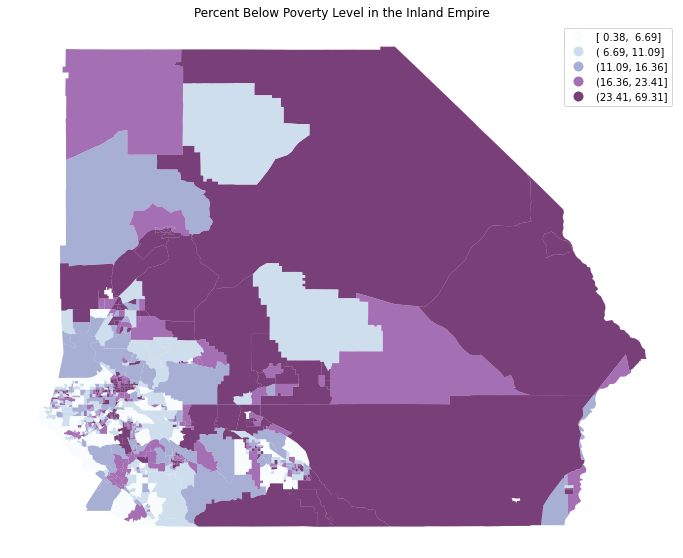

In [43]:
#first create the subplots
fig, axs = plt.subplots(1, 1, figsize=(12, 12))

#next, give each subplot a name
ax1 = axs

#percent below poverty level map (left)
poverty_combined.plot(column='Percent Below Poverty Level', 
            cmap='BuPu', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True,
           )

ax1.axis("off")
ax1.set_title("Percent Below Poverty Level in the Inland Empire")

# Census Data and Warehouses

Now that we've mapped race and poverty for Riverside and San Bernardino, I think it would be interested to see where certain warehouses are in relation to the census data. Thus far, I was only able to find data for 42 warehouses in Riverside County. I got this data from a UCSD student who worked on a similar project for her class. 

First, I'll import the csv file that contains the lat and long for the warehouses. Then, I'll overlay those locations with the census data.

## Import Warehouse Data

In [44]:
#import warehouse data
warehouse = pd.read_csv('warehouses/warehouse_locations.csv')

In [45]:
warehouse.head()

,Warehouse,Latitude,Longitude
0,Costco,33.999390,-117.55837
1,Universal Shipping Inc. a RAK Logistics Compan...,34.020710,-117.51923
2,Inland Empire Cold Storage,34.032349,-117.37912
3,Amazon Distribution DCA2,34.000990,-117.55467
4,Amazon Fulfillment Center - LGB3,34.000990,-117.55467


Since we only have latitude and longitude, we need to convert it to points so that it can be mapped easier. We'll do this using the lat and long, and create a new column that will be used to plot the warehouse locations.

In [46]:
#import needed library
from shapely.geometry import Point, Polygon

In [47]:
#create points
crs = {'init': 'espc:4326'}
       
geometry = [Point(xy) for xy in zip(warehouse["Longitude"], warehouse["Latitude"])]
geometry[:3]

In [48]:
warehouse_gdf = gpd.GeoDataFrame(warehouse,
                             geometry = geometry)
warehouse_gdf.head(3)

,Warehouse,Latitude,Longitude,geometry
0,Costco,33.999390,-117.55837,POINT (-117.55837 33.99939)
1,Universal Shipping Inc. a RAK Logistics Compan...,34.020710,-117.51923,POINT (-117.51923 34.02071)
2,Inland Empire Cold Storage,34.032349,-117.37912,POINT (-117.37912 34.03235)


## Riverside Only Race Data

As of right now, I only have warehouse locations for Riverside County. Therefore, I'm going to use the Riverside County data to overlay with the warehouse locations. This way, we'll be able to see the locations at a more detailed level. 

In [49]:
#columns to keep
columns_to_keep = ['geoid',
                   'name',
                   'B03002001',
                   'B03002012',
                   'geometry']

In [50]:
race_r_gdf = race_r_gdf[columns_to_keep]
race_r_gdf.head()

,geoid,name,B03002001,B03002012,geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1201.0,703.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2277.0,1599.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,5068.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,1734.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274..."
5,14000US06065030300,"Census Tract 303, Riverside, CA",4071.0,2035.0,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891..."


In [51]:
#rename column
race_r_gdf.columns =['geoid',
                 'name',
                 'Total',
                 'Latinx', 
                 'geometry']
race_r_gdf.head(2)

,geoid,name,Total,Latinx,geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1201.0,703.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2277.0,1599.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."


In [52]:
#normalize
race_r_gdf['Percent Latinx'] = race_r_gdf['Latinx']/race_r_gdf['Total']*100
race_r_gdf.head()

,geoid,name,Total,Latinx,geometry,Percent Latinx
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1201.0,703.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574...",58.534555
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2277.0,1599.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748...",70.223979
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,5068.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778...",66.248366
4,14000US06065030200,"Census Tract 302, Riverside, CA",4469.0,1734.0,"MULTIPOLYGON (((-117.42764 33.96848, -117.4274...",38.800627
5,14000US06065030300,"Census Tract 303, Riverside, CA",4071.0,2035.0,"MULTIPOLYGON (((-117.38958 33.97848, -117.3891...",49.987718


## Race and Warehouse Maps!!

(33.85, 34.05)

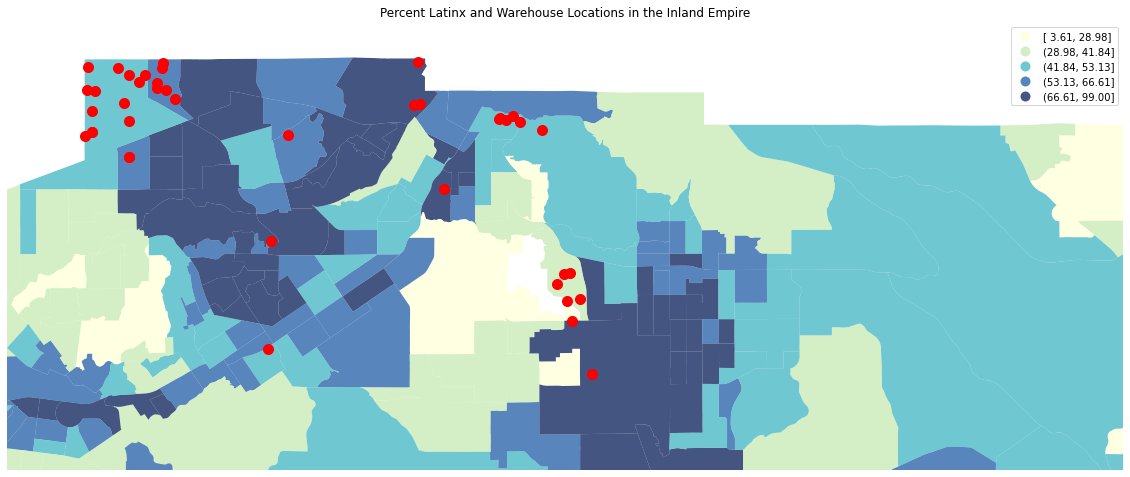

In [74]:
#subplots
fig, ax = plt.subplots(figsize=(20, 15))

#axis and title
ax.axis('off')
ax.set_title('Percent Latinx and Warehouse Locations in the Inland Empire')

#first layer: race
race_r_gdf.plot(column='Percent Latinx', 
            cmap='YlGnBu', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax,
            legend=True, 
           )

#second layer: warehouse locations
plt.scatter(x=warehouse['Longitude'], y=warehouse['Latitude'], c = 'red', s = 100)


#zoom in
plt.xlim(-117.6, -117.0)
plt.ylim(33.85, 34.05)

As you can see by the map, most of the warehouses are located in areas with at least 66% Latinx. A next step of this analysis is to account for population density in each census.

## Riverside Only Poverty Data

Next, I'm going to clean up the poverty data so that it only include Riverside Counties. Once I have more warehouse locations, I can expand my analysis to all of the Inland Empire.

In [54]:
#columns to keep
columns_to_keep = ['geoid',
                   'name',
                   'B17001001',
                   'B17001002',
                   'B17001031',
                   'geometry']

In [57]:
poverty_r_gdf = poverty_r_gdf[columns_to_keep]
poverty_r_gdf.head(3)

,geoid,name,B17001001,B17001002,B17001031,geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1191.0,189.0,1002.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2270.0,633.0,1637.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,794.0,6856.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."


In [60]:
#rename columns
poverty_r_gdf.columns = ['geoid',
                  'name',
                  'Total',
                  'Income in the past 12 months below poverty level',
                  'Income in the past 12 months at or above poverty level',
                 'geometry']
poverty_r_gdf.head(3)

,geoid,name,Total,Income in the past 12 months below poverty level,Income in the past 12 months at or above poverty level,geometry
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1191.0,189.0,1002.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574..."
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2270.0,633.0,1637.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748..."
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,794.0,6856.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778..."


In [61]:
#normalize the data
poverty_r_gdf['Percent Below Poverty Level'] = poverty_r_gdf['Income in the past 12 months below poverty level']/poverty_r_gdf['Total']*100
poverty_r_gdf['Percent At or Above Poverty Level'] = poverty_r_gdf['Income in the past 12 months at or above poverty level']/poverty_r_gdf['Total']*100

#show first 3 rows
poverty_r_gdf.head(3)

,geoid,name,Total,Income in the past 12 months below poverty level,Income in the past 12 months at or above poverty level,geometry,Percent Below Poverty Level,Percent At or Above Poverty Level
1,14000US06065030101,"Census Tract 301.01, Riverside, CA",1191.0,189.0,1002.0,"MULTIPOLYGON (((-117.35750 33.99337, -117.3574...",15.869018,84.130982
2,14000US06065030103,"Census Tract 301.03, Riverside, CA",2270.0,633.0,1637.0,"MULTIPOLYGON (((-117.37502 34.00081, -117.3748...",27.885463,72.114537
3,14000US06065030104,"Census Tract 301.04, Riverside, CA",7650.0,794.0,6856.0,"MULTIPOLYGON (((-117.38028 34.00716, -117.3778...",10.379085,89.620915


## Poverty and Warehouse Maps!! (Parte Dos)

(33.85, 34.05)

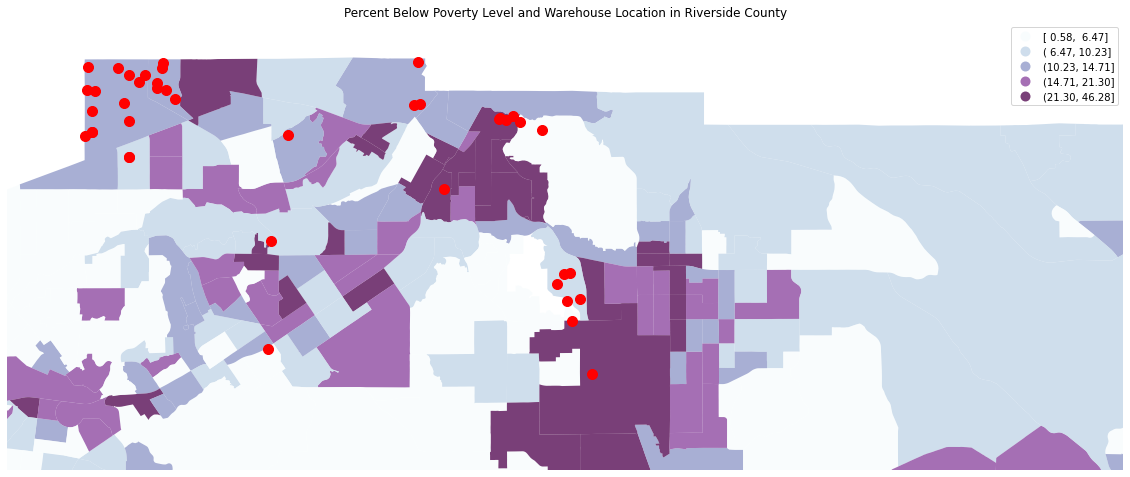

In [75]:
#subplots
fig, ax = plt.subplots(figsize=(20, 15))

#axis and title
ax.axis('off')
ax.set_title('Percent Below Poverty Level and Warehouse Location in Riverside County')

#first layer: race
poverty_r_gdf.plot(column='Percent Below Poverty Level', 
            cmap='BuPu', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax,
            legend=True, 
           )

#second layer: warehouse locations
plt.scatter(x=warehouse['Longitude'], y=warehouse['Latitude'], c = 'red', s = 100)


#zoom in
plt.xlim(-117.6, -117.0)
plt.ylim(33.85, 34.05)

The results on here are not what I thought they would be. There doesn't seem to be any visual pattern on where the warehouses are located with regards to poverty level. Again, a limitation is that I don't have more data on warehouse locations. Additionally, I mapped the poverty and race data by quantiles. It might be interesting to see how it shifts based on how I decide to map the variables. 